In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\Abhi'

In [3]:
os.chdir('C:\\Users\\Abhi\\documents\\readings')

In [4]:
df=pd.read_csv('hotel_booking.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [8]:
df.drop(['name','email','phone-number','credit_card'],axis=1,inplace=True)

In [9]:
df.shape

(119390, 32)

In [10]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [5]:
df['reservation_status_date'] =pd.to_datetime(df['reservation_status_date'])

In [6]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [7]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.drop(['agent','company'],axis=1,inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

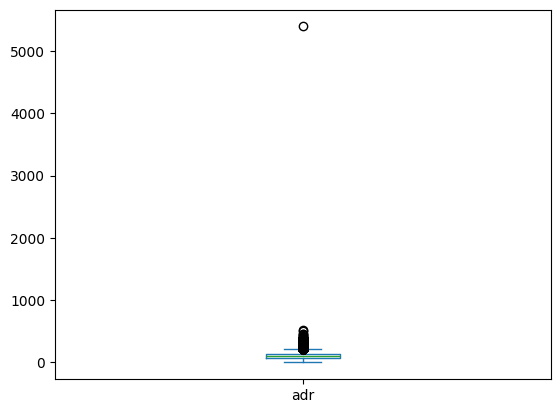

In [11]:
df['adr'].plot(kind='box')

In [12]:
df=df[df['adr']<5000]

# Data Analysis

In [13]:
canceled_perc=df['is_canceled'].value_counts(normalize =True)
canceled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


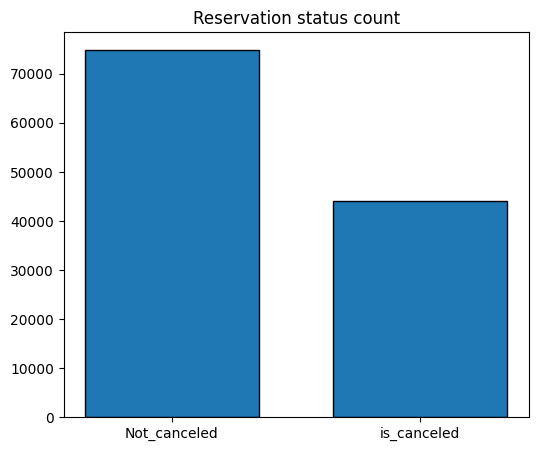

In [14]:
canceled_perc
print(canceled_perc)
plt.figure(figsize=(6,5))
plt.title('Reservation status count')
plt.bar(['Not_canceled','is_canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

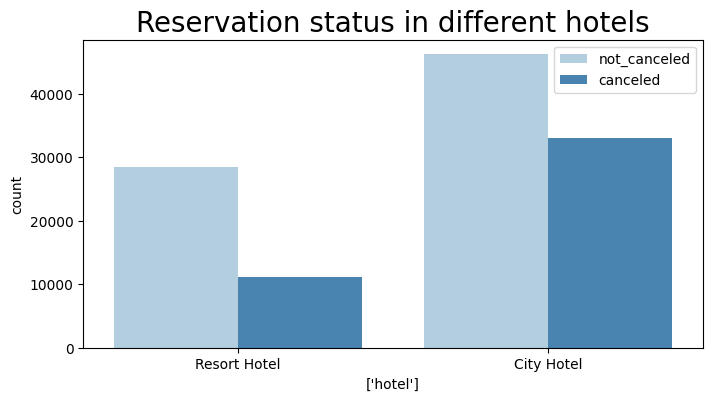

In [15]:
plt.figure(figsize=(8,4))
axl=sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
legend_labels,_=axl.get_legend_handles_labels()
plt.title('Reservation status in different hotels',size=20)
plt.xlabel(['hotel'])
plt.legend(['not_canceled','canceled'])
plt.show()

In [12]:
resort_hotel=df[df['hotel'] =='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
city_hotel=df[df['hotel'] =='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [6]:
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [32]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [33]:
df["reservation_status_date"].dtype

dtype('<M8[ns]')

In [8]:
df["adr"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
adr,119390.0,101.831122,50.53579,-6.38,69.29,94.575,126.0,5400.0


In [14]:
resort_hotel["adr"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
adr,40060.0,94.95293,61.442418,-6.38,50.0,75.0,125.0,508.0


In [15]:
city_hotel["adr"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
adr,79330.0,105.304465,43.602954,0.0,79.2,99.9,126.0,5400.0


In [29]:
resort_hotel = df[df["hotel"]=="Resort Hotel"]
city_hotel = df[df["hotel"]=="City Hotel"]
print(resort_hotel.shape,city_hotel.shape)

(40060, 36) (79330, 36)


In [20]:
resort_hotel_final =resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_final =resort_hotel.groupby('reservation_status_date')[['adr']].mean()

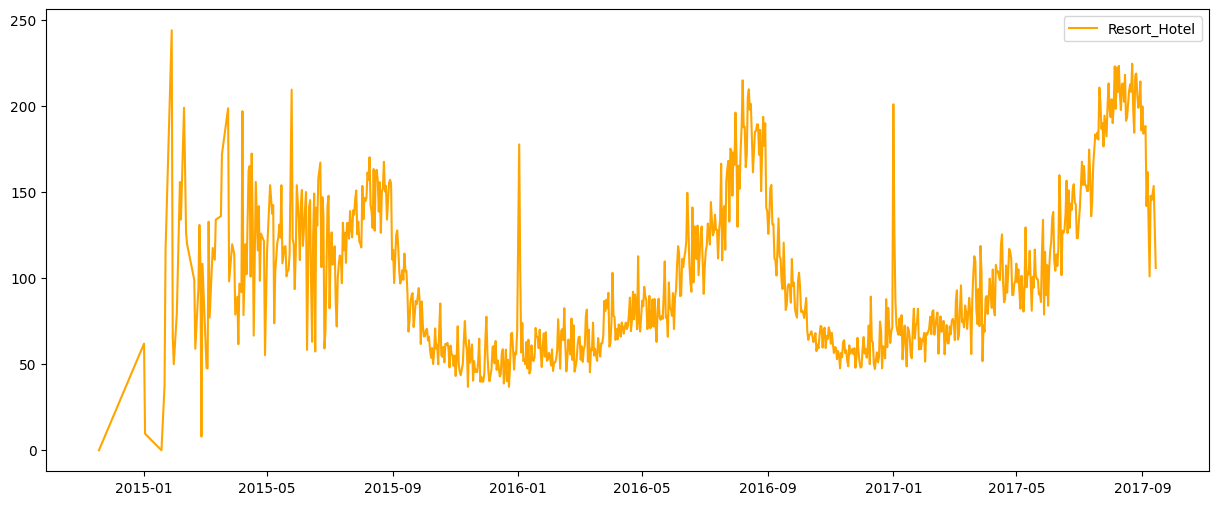

In [38]:
plt.figure(figsize=(15,6))
plt.plot(resort_hotel_final.index,resort_hotel_final.values,label="Resort_Hotel",color="orange")
plt.xticks(ticks=None)
plt.legend()
plt.show()

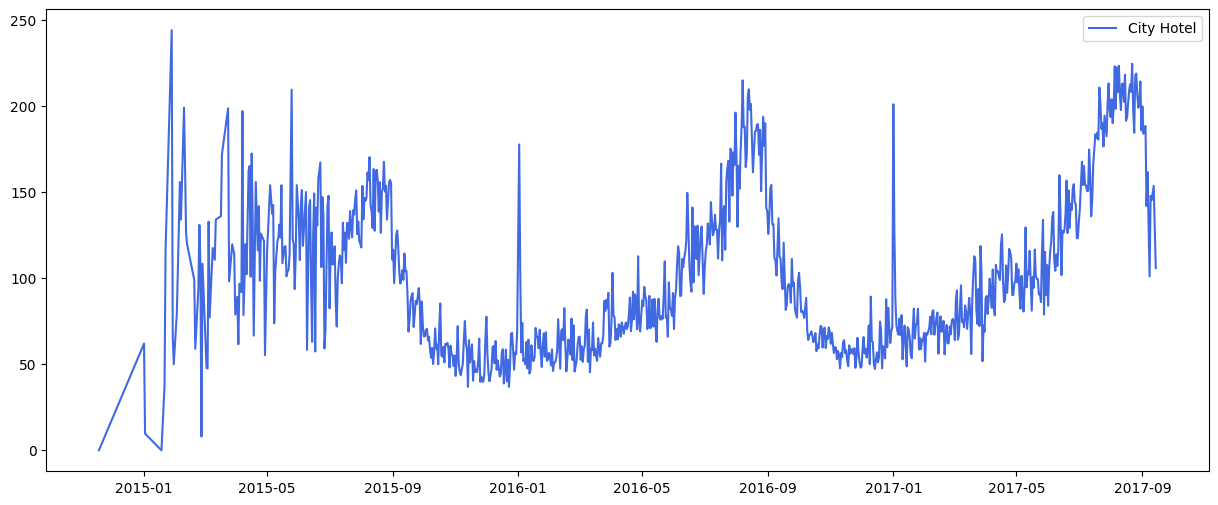

In [41]:
plt.figure(figsize=(15,6))
plt.plot(city_hotel_final.index,city_hotel_final.values,label="City Hotel",color="royalblue")
plt.xticks(ticks=None)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(resort_hotel_final.index,resort_hotel_final.values,label="Resort_Hotel",color="red")
plt.plot(city_hotel_final.index,city_hotel_final.values,label="City Hotel",color="blue")
plt.xticks(ticks=None)
plt.legend()
plt.show()

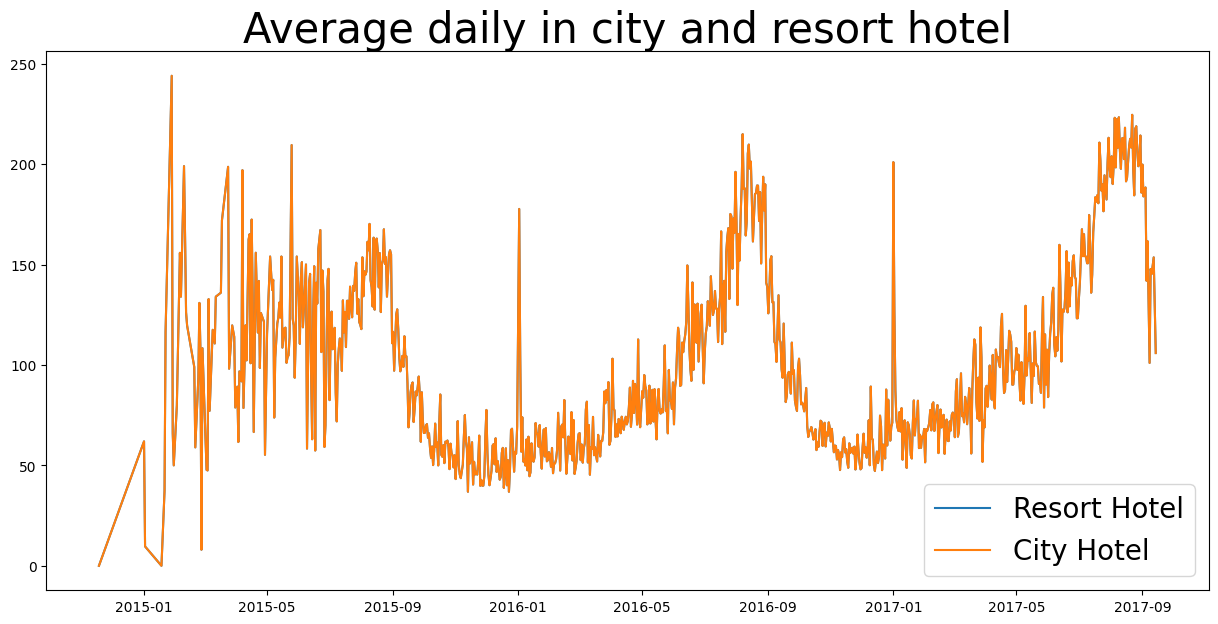

In [31]:
plt.figure(figsize=(15,7))
plt.title('Average daily in city and resort hotel',fontsize=30)
plt.plot(resort_hotel_final.index,resort_hotel_final['adr'],label='Resort Hotel')
plt.plot(city_hotel_final.index,city_hotel_final['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

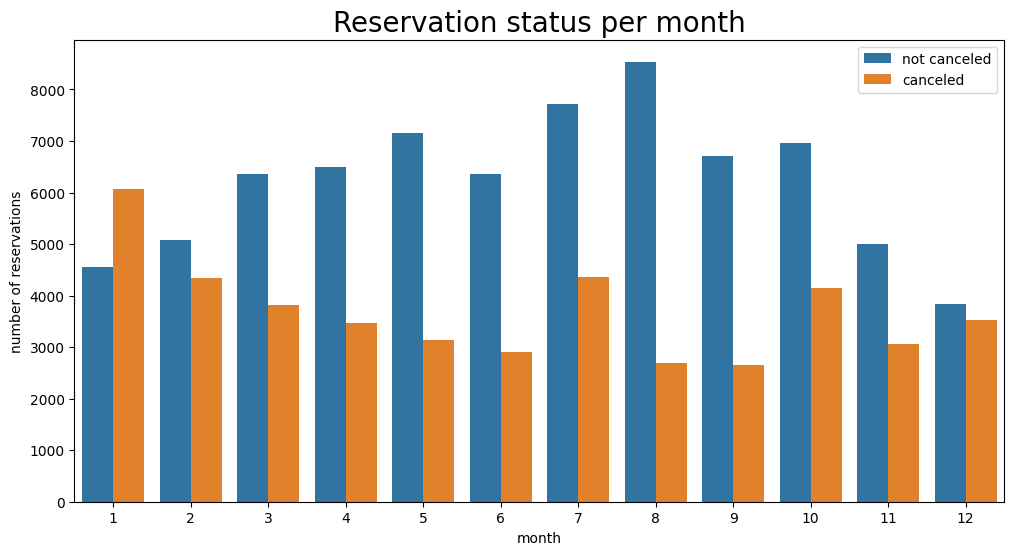

In [20]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(12,6))
axl=sns.countplot(x='month',hue='is_canceled',data=df)
plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


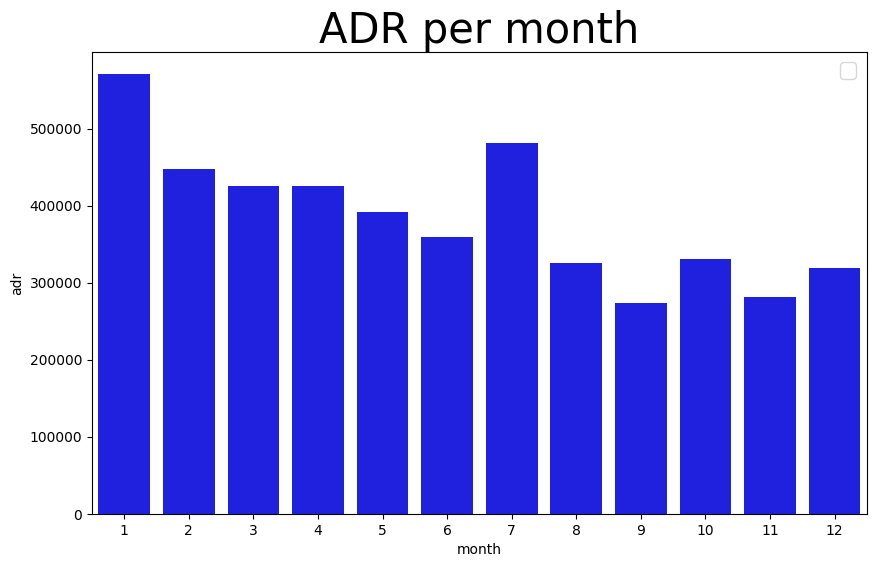

In [51]:
plt.figure(figsize=(10,6))
plt.title('ADR per month',fontsize=30)
sns.barplot(x='month',y='adr',color='blue',data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.legend(fontsize=15)
plt.show()

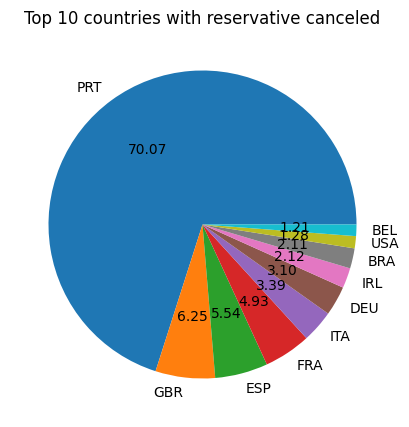

In [41]:
canceled_df=df[df['is_canceled']==1]
top_10_country=canceled_df['country'].value_counts()[:10]
plt.figure(figsize=(6,5))  
plt.title('Top 10 countries with reservative canceled')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

In [22]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [23]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [27]:
canceled_df=df['market_segment'].value_counts(normalize=True)
canceled_df

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [31]:
canceled_df=df[df['is_canceled']==1]

In [32]:
canceled_df_adr = canceled_df.groupby('is_canceled')[['adr']].mean()
canceled_df_adr

,adr
is_canceled,
1,104.917985


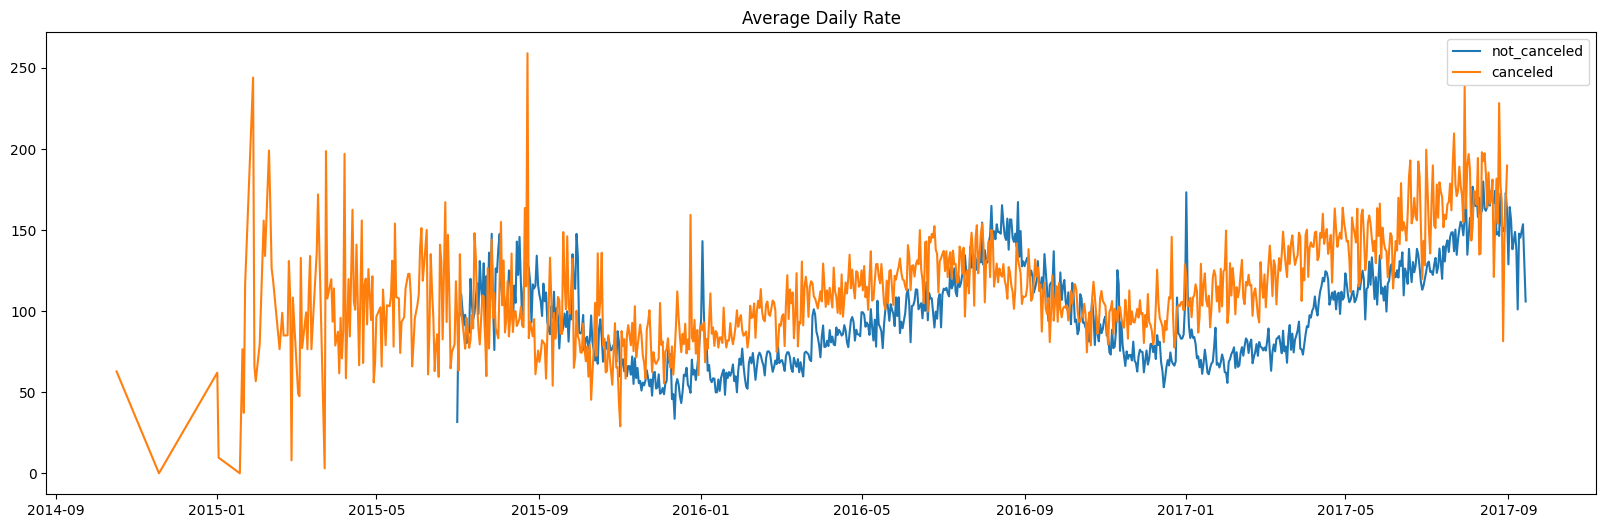

In [33]:
canceled_df_adr=canceled_df.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date',inplace=True)

not_canceled_df=df[df['is_canceled']==0]
not_canceled_df_adr=not_canceled_df.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label='not_canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label='canceled')
plt.legend()

In [37]:
canceled_df_adr=canceled_df_adr[(canceled_df_adr['reservation_status_date']>'2016') & (canceled_df_adr['reservation_status_date']<'2017-09')]
not_canceled_df_adr=not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date']>'2016') & (not_canceled_df_adr['reservation_status_date']<'2017-09')]

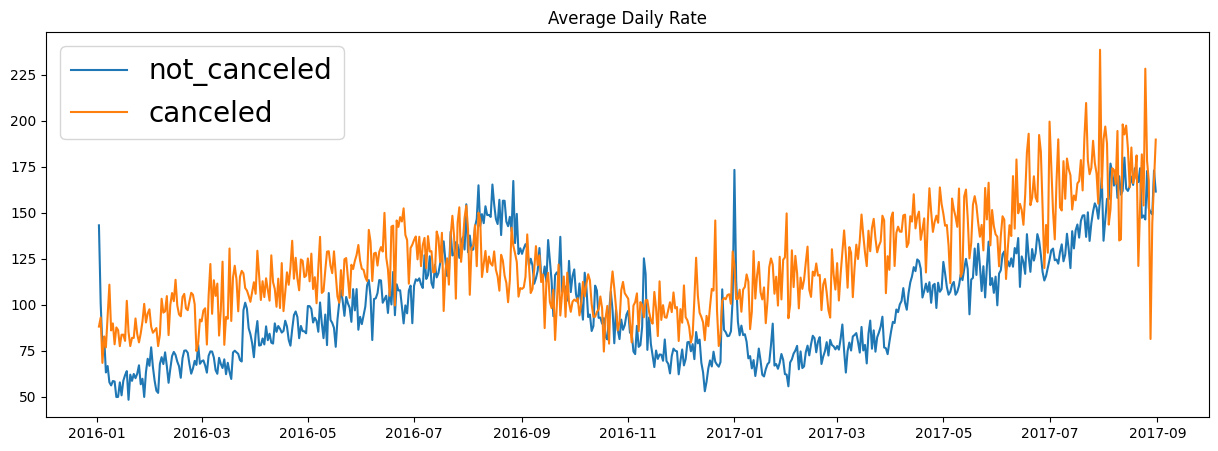

In [50]:
plt.figure(figsize=(15,5))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label='not_canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label='canceled')
plt.legend(fontsize=20)